In [1]:
import os
import sys
parent = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(parent)

import pandas as pd
import numpy as np
import covidtracking
import matplotlib.pyplot as plt

start = pd.to_datetime('2020-03-04')
US = covidtracking.load_us()

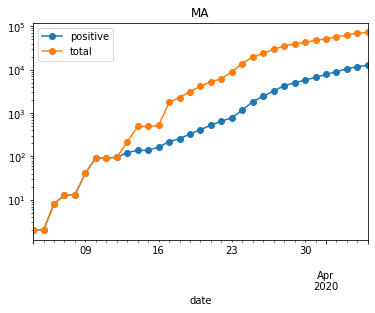

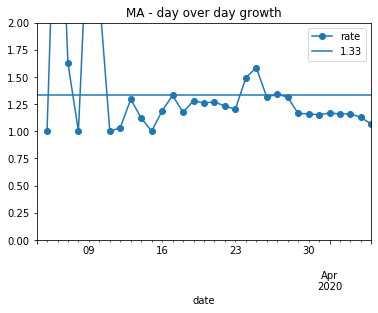

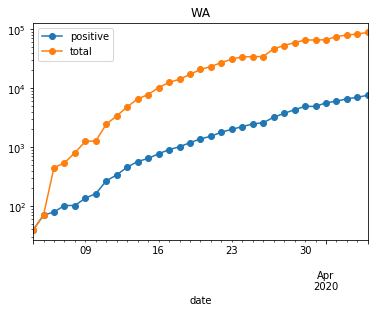

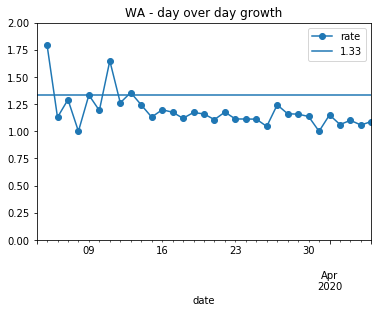

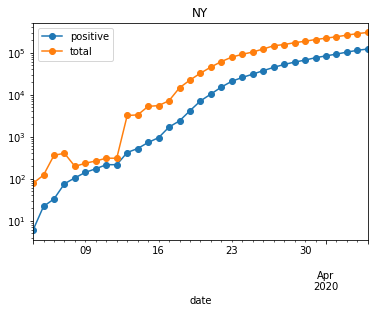

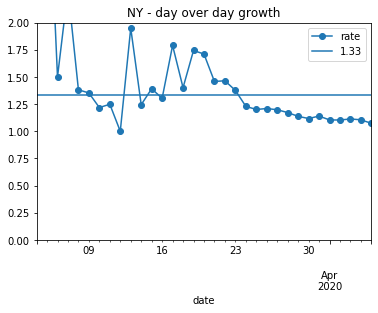

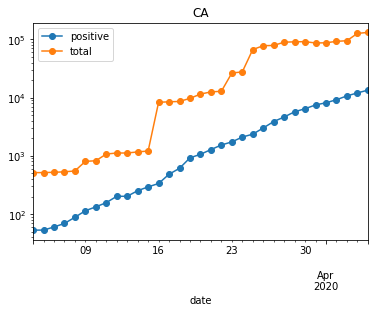

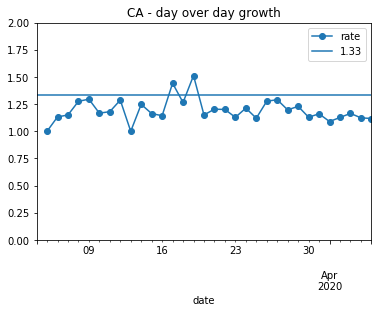

In [2]:
for state in ['MA', 'WA', 'NY', 'CA']:
    cols = ['positive', 'total']
    US[state][start:].plot(y=cols, style='-o')
    plt.yscale('log')
    plt.title(state)
    plt.show()

    cols = ['positive']
    rate = US[state].loc[start:, cols].apply(np.log).diff().apply(np.exp)
    ax = rate.plot(style='-o')
    plt.title(f'{state} - day over day growth')
    plt.ylim([0, 2])
    l2 = plt.axhline(1.33)
    plt.legend([ax.lines[0]] + [l2], ['rate', '1.33'])
    plt.show()

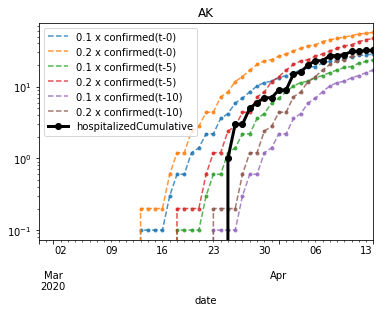

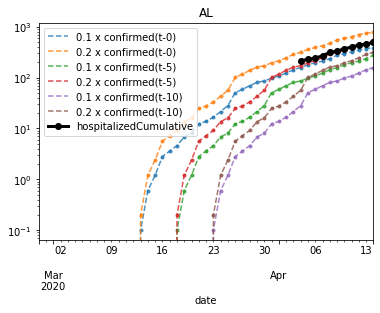

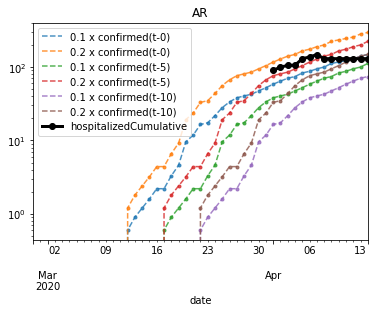

/Users/sheldon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


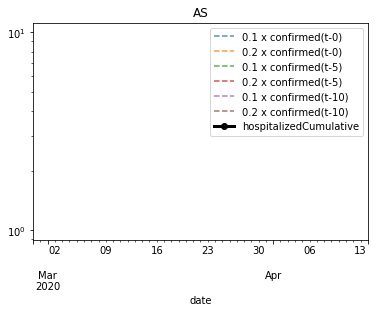

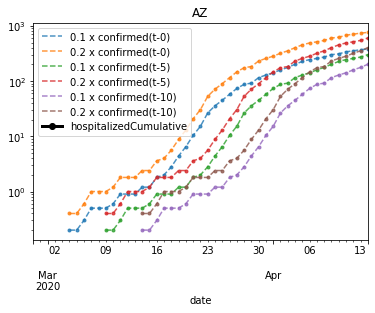

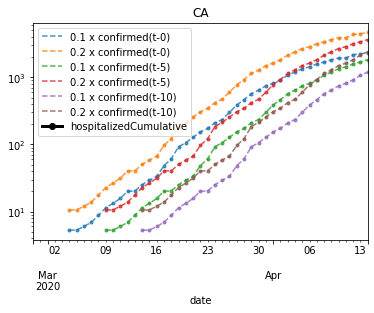

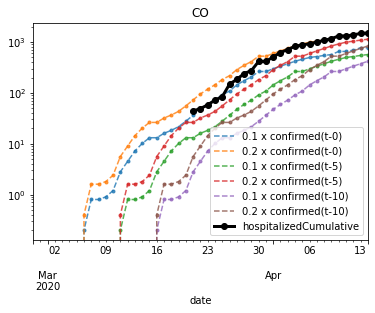

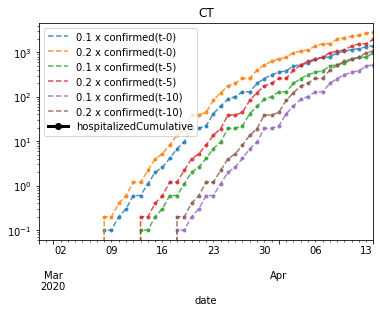

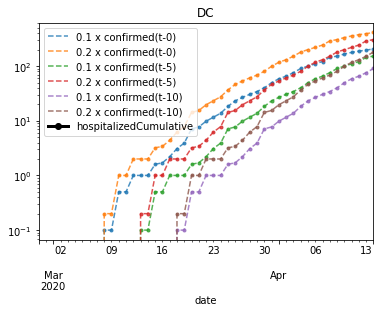

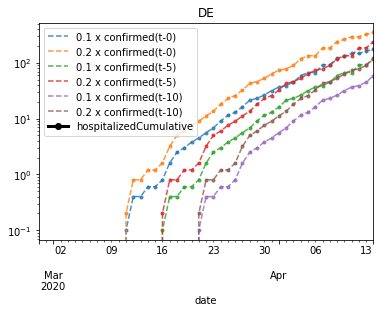

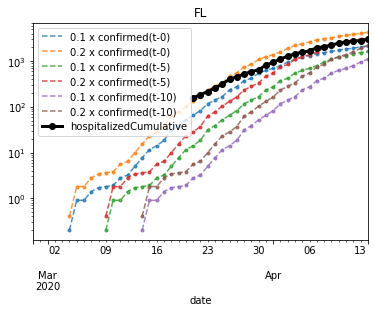

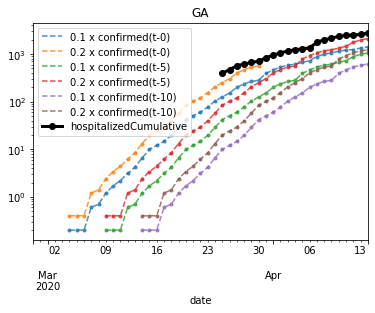

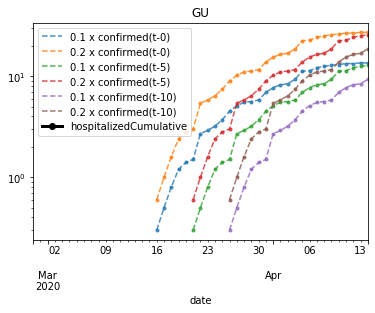

KeyboardInterrupt: 

In [2]:
cols = ['confirmed', 'death', 'hospitalizedCumulative']

states = US.columns.unique(level=0)
#states = ['WA']

target = 'hospitalizedCumulative'

shifts = [0, 5, 10]
scales = [0.1, 0.2]

for state in states:
    data = {col: US[state][col] for col in cols}
    df = pd.DataFrame(data = data)
    predictors = []
    for shift in shifts:
        for scale in scales:
            name = f'{scale} x confirmed(t-{shift})'
            df[name] = scale*df.confirmed.shift(shift)
            predictors.append(name)
    
    fig, ax = plt.subplots()
    df.plot(style='--.', y = predictors, ax=ax, alpha=0.8)
    df.plot(style='-o', y = target, ax=ax, color='k', linewidth=3)
    plt.title(state)
    plt.yscale('log')

    filename = f'vis2/{target}_{state}.png'
    plt.savefig(filename)
    
    plt.show()


In [5]:
display(US.MA)

,confirmed,death,deathIncrease,fips,hash,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,...,onVentilatorCumulative,onVentilatorCurrently,pending,posNeg,positive,positiveIncrease,recovered,total,totalTestResults,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-03-04,2.0,NaN,NaN,25.0,36d8d4b1b34007477b562a078613309f63e7bd0e,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0,2.0,NaN
2020-03-05,2.0,NaN,0.0,25.0,ad6e88d352dfa8b8f0dd1bf41a2c506911f25bc0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,2.0,2.0,0.0,NaN,2.0,2.0,0.0
2020-03-06,8.0,NaN,0.0,25.0,ba07a81180b3f869f4fc9a15473d56c77bda4a58,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,8.0,8.0,6.0,NaN,8.0,8.0,6.0
2020-03-07,13.0,NaN,0.0,25.0,b919208fee55fb337773b232ea6298e5465a717d,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,13.0,13.0,5.0,NaN,13.0,13.0,5.0
2020-03-08,13.0,NaN,0.0,25.0,db7ba78165b69c05b53151fbdc1d322c2e5a1688,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,13.0,13.0,0.0,NaN,13.0,13.0,0.0
2020-03-09,41.0,NaN,0.0,25.0,bcf1ffcd7a8be3ab88adca44ae7ca0012a0b6cb7,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,41.0,41.0,28.0,NaN,41.0,41.0,28.0
2020-03-10,92.0,NaN,0.0,25.0,5b2241741b78dcad0513de205c9dba09feae3b20,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,92.0,92.0,51.0,NaN,92.0,92.0,51.0
2020-03-11,92.0,NaN,0.0,25.0,cd9166102dba61e473c3f2e49f4ad84e9876c8ad,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,92.0,92.0,0.0,NaN,92.0,92.0,0.0
2020-03-12,95.0,NaN,0.0,25.0,2b11362fc52b477bca21e635eb9f2b88e8a5d61f,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,95.0,95.0,3.0,NaN,95.0,95.0,3.0
